In [5]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False

In [6]:
lam = 0.4 #lambda
mu = 0.25 #mu
rho = 0.1 #discount factor lam+2*mu+rho=1
cost = 0.001 #technological cost
a = 0.9 #fault probability
p1 = 0.1
p2 = 0.9
theta = 0.001 #converge threshold
maxLength = 32

In [7]:
value = np.zeros([maxLength+1, maxLength+1])
policy = np.zeros([maxLength+1, maxLength+1])
while True:
    while True:
        delta = 0
        val = value.copy()
        for x in range(maxLength+1):
            for y in range(maxLength+1):
                v = value[x][y]
                b = policy[x][y]
                xx = min(x+1,maxLength)
                yy = min(y+1,maxLength)
                if xx == x or yy == y:
                    value[x][y] = x+y+cost*b+mu*(val[max(x-1,0)][y]+val[x][max(y-1,0)])+(1-(1-b)*a)*lam*max(val[xx][y],val[x][yy])+p1*(1-b)*a*lam*val[xx][y]+p2*(1-b)*a*lam*val[x][yy]
                else:
                    value[x][y] = x+y+cost*b+mu*(val[max(x-1,0)][y]+val[x][max(y-1,0)])+(1-(1-b)*a)*lam*min(val[xx][y],val[x][yy])+p1*(1-b)*a*lam*val[xx][y]+p2*(1-b)*a*lam*val[x][yy]
                delta = max(delta, abs(v-value[x][y]))
        if delta<theta:
            break
    stable = True
    for x in range(maxLength+1):
        for y in range(maxLength+1):
            old = policy[x][y]
            xx = min(x+1,maxLength)
            yy = min(y+1,maxLength)
            diff = a*lam*(p1*value[xx][y]+p2*value[x][yy]-min(value[xx][y],value[x][yy]))
            if diff <= cost:
                policy[x][y] = 0
            else:
                policy[x][y] = 1
            if old != policy[x][y]:
                stable = False
    if stable:
        break

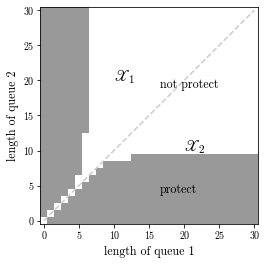

In [10]:
# Z is your data set
N = maxLength-1
Z = policy[:N,:N]

# G is a NxNx3 matrix
G = np.zeros((N,N,3))

# Where we set the RGB for each pixel
G[Z == 0] = [1,1,1]
G[Z == 1] = [0.6,0.6,0.6]

plt.imshow(G,interpolation='nearest')
plt.gca().invert_yaxis()
plt.yticks([y for y in range(N) if y % 5 == 0])
plt.text(16.5, 19, "not protect", size=12)
plt.text(16.5, 4, "protect", size=12)
plt.text(10, 20, "$\mathscr{X}_1$", size=16)
plt.text(20, 10, "$\mathscr{X}_2$", size=16)
plt.plot([0, 30], [0, 30], ls="--", c=".8")
plt.xlabel('length of queue 1',size=12)
plt.ylabel('length of queue 2',size=12)
# plt.show()
plt.savefig("Fig3.eps")